In [2]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv('netflix.csv')
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


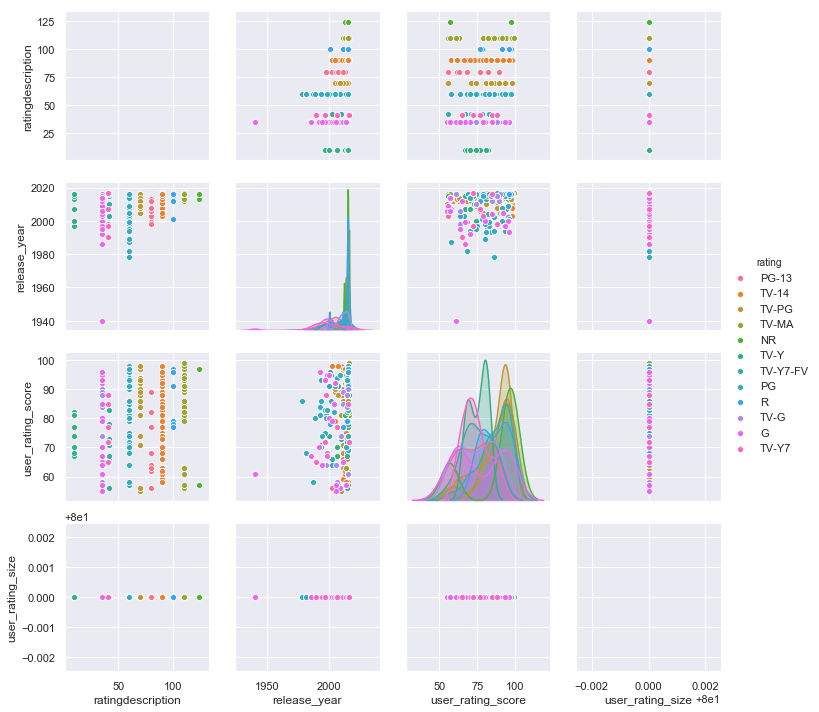

In [5]:
#drop rows with missing values and drop duplicates
df.dropna(inplace=True)
df.drop_duplicates

#visualize pairplot of df
sns.pairplot(df, hue='rating')

In [6]:
# Get summary stats of df
df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,574.000000,574.000000,574.000000,574.0
mean,71.945993,2009.984321,84.043554,80.0
std,27.585606,9.502903,12.308988,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2006.000000,74.000000,80.0
50%,70.000000,2015.000000,88.000000,80.0
75%,90.000000,2016.000000,95.000000,80.0
max,124.000000,2017.000000,99.000000,80.0


In [8]:
# group by year
df_by_year = df.groupby('release_year')

# check type of GroupBy object
type(df_by_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
# summary stats over the years
df_by_year.describe().head()

ratingdescription                                           \
                         count  mean  std   min   25%   50%   75%   max   
release_year                                                              
1940                       3.0  35.0  0.0  35.0  35.0  35.0  35.0  35.0   
1978                       2.0  60.0  0.0  60.0  60.0  60.0  60.0  60.0   
1982                       3.0  60.0  0.0  60.0  60.0  60.0  60.0  60.0   
1986                       4.0  35.0  0.0  35.0  35.0  35.0  35.0  35.0   
1987                       2.0  60.0  0.0  60.0  60.0  60.0  60.0  60.0   

             user_rating_score        ...             user_rating_size        \
                         count  mean  ...   75%   max            count  mean   
release_year                          ...                                      
1940                       3.0  61.0  ...  61.0  61.0              3.0  80.0   
1978                       2.0  86.0  ...  86.0  86.0              2.0  80.0   
1982                       3.0  68.0  ...  68.0  68.0              3.0  80.0   
1986                       4.0  67.0  ...  67.0  67.0              4.0  80.0   
1987                       2.0  58.0  ...  58.0  58.0              2.0  80.0   

                                                 
              std   min   25%   50%   75%   max  
release_year                                     
1940          0.0  80.0  80.0  80.0  80.0  80.0  
1978          0.0  80.0  80.0  80.0  80.0  80.0  
1982          0.0  80.0  80.0  80.0  80.0  80.0  
1986          0.0  80.0  80.0  80.0  80.0  80.0  
1987          0.0  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [10]:
# cast grouping as a list and check out one year
list(df_by_year)[10]

(1995,             title rating                                ratinglevel  \
 766         Balto      G  General Audiences. Suitable for all ages.   
 807         Balto      G  General Audiences. Suitable for all ages.   
 866         Balto      G  General Audiences. Suitable for all ages.   
 914         Balto      G  General Audiences. Suitable for all ages.   
 964         Balto      G  General Audiences. Suitable for all ages.   
 967  Heavyweights     PG              some rude language and pranks   
 
      ratingdescription  release_year  user_rating_score  user_rating_size  
 766                 35          1995               64.0                80  
 807                 35          1995               64.0                80  
 866                 35          1995               64.0                80  
 914                 35          1995               64.0                80  
 964                 35          1995               64.0                80  
 967                 60   

In [11]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingdescription,user_rating_score,user_rating_size
release_year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [12]:
# print index of df
print(df.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            970, 972, 973, 974, 979, 984, 986, 988, 991, 995],
           dtype='int64', length=574)


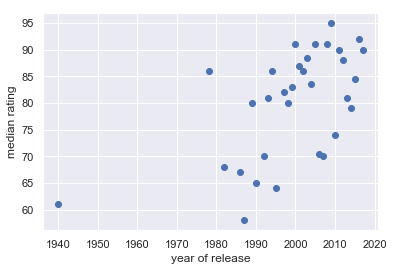

In [13]:
# Slice out user rating and plot
df_rat_by_year = df_med_by_year['user_rating_score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');